In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/SONY/Documents/CSV_Files/Books_data.csv")
data.head()

,bid,title,author,category,status
0,1,Steve Jobs,Walter Issacson,Biography,issued
1,2,Discovery of India,Jawaharlal Nehru,History,issued
2,3,My Experiments with Truth,Mahatma Gandhi,Autobiography,issued
3,4,Object Oriented Programming with C++,E Balagurusamy,Education,issued
4,5,Thinking with type,Ellen Lupton,Arts,issued


In [16]:
titles = data['category'].tolist()
titles

['Biography',
 'History',
 'Autobiography',
 'Education',
 'Arts',
 'Photography',
 'Economics',
 'Management',
 'Law',
 'Health',
 'Fiction',
 'Fiction',
 'Philosophical fiction',
 'Education',
 'Education',
 'Autobiography',
 'Personal Development',
 'Personal Development',
 'Business',
 'High Fantasy',
 'SPACE',
 'Story',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Philosophy',
 'Philosophy',
 'Philosophy',
 'Philosophy',
 'Philosophy',
 'Autobiography',
 'Autobiography',
 'Autobiography',
 'Autobiography',
 'Economics',
 'Economics',
 'Economics',
 'Economics',
 'Economics',
 'Story',
 'Story',
 'Story',
 'Story',
 'Story',
 'History',
 'History',
 'History',
 'History',
 'History',
 'Biography',
 'Biography',
 'Biography',
 'Biography',
 'Biography',
 'Historical novel',
 'Historical fiction']

In [17]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

In [18]:
# Clustering using KMeans
k = 5  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [19]:
# Function to assign books to clusters
def assign_books_to_clusters(titles, clusters):
    clustered_books = {}
    for i, title in enumerate(titles):
        cluster_label = clusters[i]
        if cluster_label not in clustered_books:
            clustered_books[cluster_label] = []
        clustered_books[cluster_label].append(title)
    return clustered_books

# Assign books to clusters
clustered_books = assign_books_to_clusters(titles, kmeans.labels_)

# Function to search for books in a cluster
def search_books(clustered_books, query):
    for cluster_label, books in clustered_books.items():
        if query in ' '.join(books).lower():
            return books
    return []

In [21]:
# Example usage
query = "biography"
found_books = search_books(clustered_books, query.lower())
if found_books:
    print("Books related to '{}' found in the library:".format(query))
    for book in found_books:
        print("-", book)
else:
    print("No books related to '{}' found in the library.".format(query))


Books related to 'biography' found in the library:
- Biography
- Education
- Arts
- Photography
- Management
- Law
- Health
- Education
- Education
- Personal Development
- Personal Development
- Business
- High Fantasy
- SPACE
- Story
- Philosophy
- Philosophy
- Philosophy
- Philosophy
- Philosophy
- Story
- Story
- Story
- Story
- Story
- Biography
- Biography
- Biography
- Biography
- Biography
- Historical novel


In [22]:
# Print clusters and their books
for cluster_label, books in clustered_books.items():
    print("Cluster {}:".format(cluster_label))
    for book in books:
        print("-", book)
    print()

Cluster 0:
- Biography
- Education
- Arts
- Photography
- Management
- Law
- Health
- Education
- Education
- Personal Development
- Personal Development
- Business
- High Fantasy
- SPACE
- Story
- Philosophy
- Philosophy
- Philosophy
- Philosophy
- Philosophy
- Story
- Story
- Story
- Story
- Story
- Biography
- Biography
- Biography
- Biography
- Biography
- Historical novel

Cluster 4:
- History
- History
- History
- History
- History
- History

Cluster 2:
- Autobiography
- Autobiography
- Autobiography
- Autobiography
- Autobiography
- Autobiography

Cluster 3:
- Economics
- Economics
- Economics
- Economics
- Economics
- Economics

Cluster 1:
- Fiction
- Fiction
- Philosophical fiction
- Fiction
- Fiction
- Fiction
- Fiction
- Fiction
- Fiction
- Fiction
- Fiction
- Historical fiction



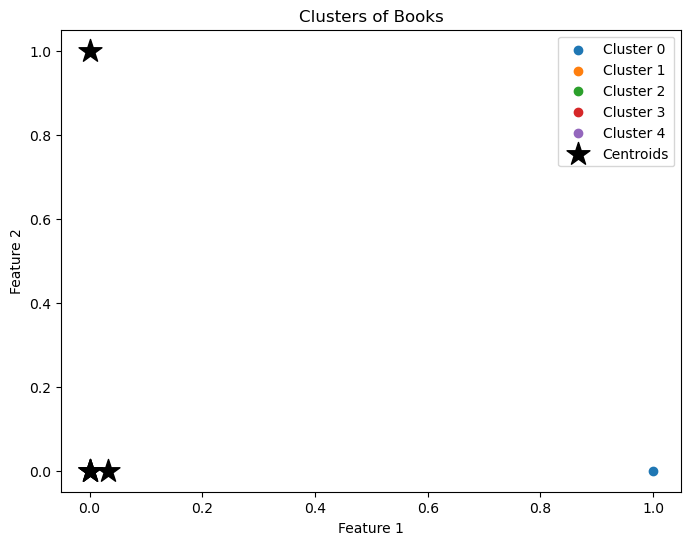

In [23]:
import matplotlib.pyplot as plt

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Assign each data point to its cluster
cluster_labels = kmeans.labels_

# Create scatter plot
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = X[cluster_labels == i].toarray()  # Convert CSR matrix to array
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i))

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='Centroids')

plt.title('Clusters of Books')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

